<div class='container' style='border-bottom: 1px solid; width:100%'>
    <div style='float:left'>
    Bernat Esquirol & Pere Gilabert 
    </div>
    <div style='float:right'>
    Complex Networks 2019
    </div>
</div>

# Delivery 04: Communities

## The graphs

### Import created graphs

In [95]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from matplotlib import pyplot as plt
from networkx.algorithms import community

%matplotlib inline

To speed up the calculations that follow, we have built networks of 636 and 1029 nodes respectively.
Here you can change the parameter N to switch between the two files we have stored.

In [96]:
spotify = nx.read_gpickle('../data/playlists_small_projection.gpkl')
pos = nx.spring_layout(spotify)

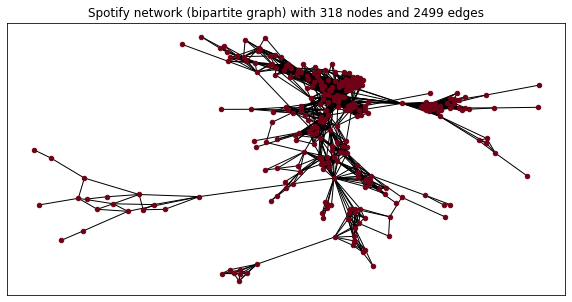

In [97]:
plt.figure(figsize=(10,5))
nx.draw_networkx(spotify, with_labels=False, node_size=20, node_color="#6f0216")
plt.title("Spotify network (bipartite graph) with {:d} nodes and {:d} edges".format(len(spotify.nodes), 
                                                                                    len(spotify.edges)))
plt.show()

## Identifying communities (Modularity-based algorithm)

In [98]:
communities = sorted(community.greedy_modularity_communities(spotify), key=len, reverse=True)

In [99]:
print("This method identified {} communities".format(len(communities)))

This method identified 4 communities


In [100]:
print("Performance: {:6.4f}".format(community.performance(spotify, communities)))

Performance: 0.5293


In [101]:
print("Coverage: {:6.4f}".format(community.coverage(spotify, communities)))

Coverage: 0.9852


### The biggest

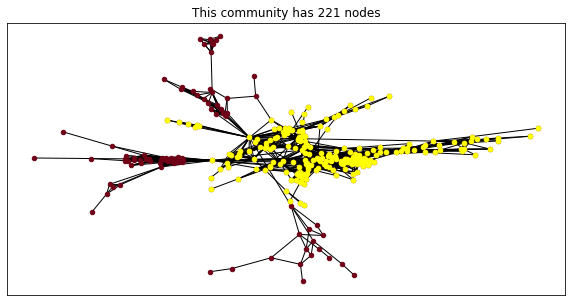

In [102]:
plt.figure(figsize=(10,5))
nx.draw_networkx(spotify, pos=pos, with_labels=False, node_size=20, node_color="#6f0216")
plt.title("This community has {:d} nodes".format(len(communities[0]),len(spotify.edges)))
nx.draw_networkx_nodes(list(communities[0]), pos=pos,
                      node_size=21, node_color='#ffff00')
plt.show()

## Visualizing all comunities

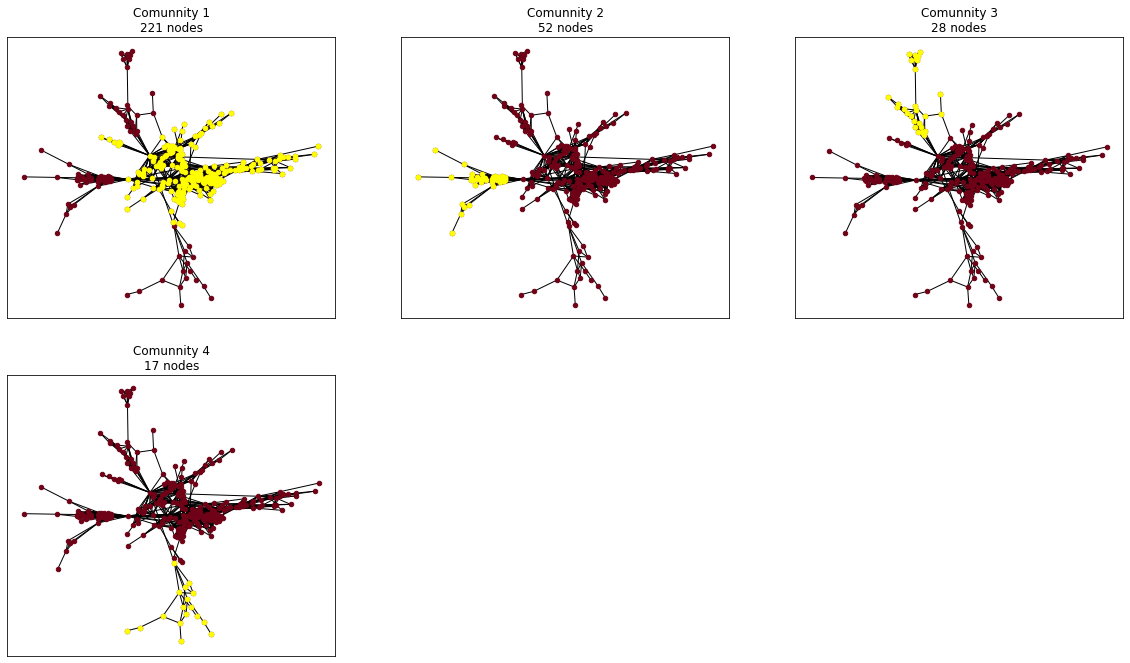

In [103]:
fig = plt.figure(figsize=(20,30))

for idx, com in enumerate(communities):
    ax = fig.add_subplot(5,3,idx+1)
    nx.draw_networkx(spotify, pos=pos, with_labels=False, node_size=20, node_color="#6f0216")
    nx.draw_networkx_nodes(list(com), pos=pos,
                       node_size=21, node_color="#ffff00")
    ax.set_title("Comunnity {:d}\n{:d} nodes".format(idx+1, len(com)))
plt.show()

## Alltogether

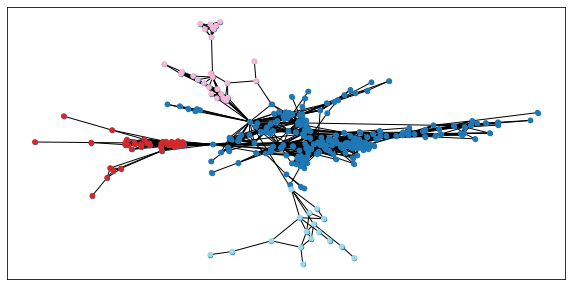

In [104]:
plt.figure(figsize=(10,5))
nx.draw_networkx(spotify, pos=pos, with_labels=False, node_size=20)

nodes = []
cols=[]
for idx, com in enumerate(communities):
    nodes+=list(com)
    cols+=[idx]*len(com)

nx.draw_networkx_nodes(nodes, pos=pos,
                       node_size=21, node_color=cols,
                       cmap=plt.cm.tab20)
plt.show()

In this case, the playlists are extracted from the categories in spotify, so we have a kind of back ground truth of the communities

In [105]:
df = pd.read_csv('../data/playlists_categories.csv').set_index('id')['genre']

In [106]:
genres = df.unique()

In [107]:
color_mapping = df.apply(lambda x:np.argwhere(genres==x)[0][0]).to_dict()
for k in [n for n in nodes if not n in color_mapping]:
    color_mapping[k]=None

We plot now the categories where we took those playlists from.

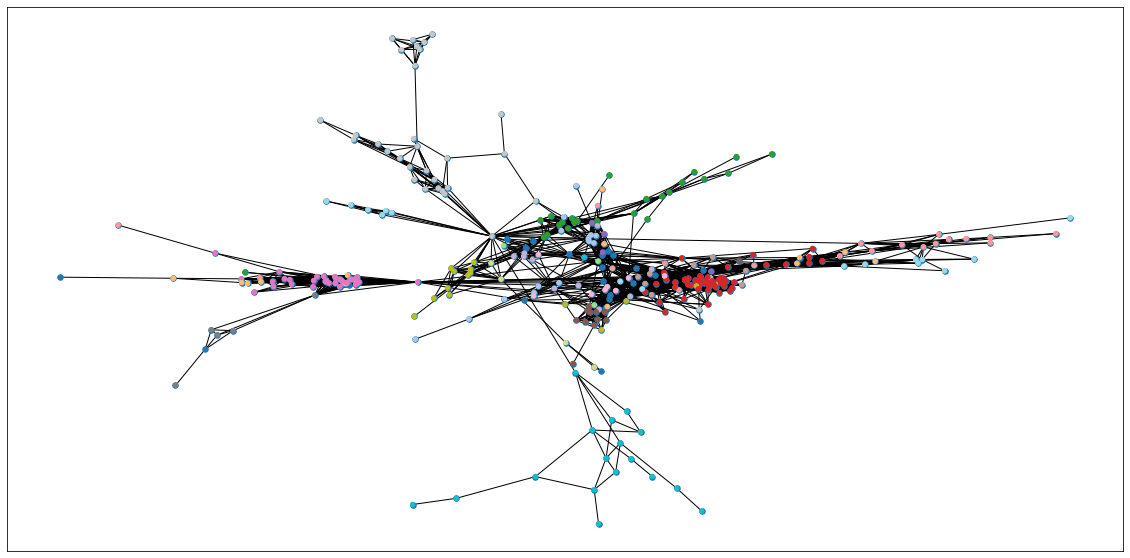

In [108]:
plt.figure(figsize=(20,10))
nx.draw_networkx(spotify, pos=pos, with_labels=False, node_size=30)

nodes = []
cols=[]
for idx, com in enumerate(communities):
    nodes+=list(com)
    cols+=[idx]*len(com)
nx.draw_networkx_nodes(nodes, pos=pos,
                       
                       node_size=21, node_color=[color_mapping[n] for n in nodes],
                       cmap=plt.cm.tab20)
plt.show()

The bottom cluster on top are in "arab" category

In [91]:
df['37i9dQZF1DX9HeUXWsJonl']

'arab'

In the left we see jazz

In [88]:
df['37i9dQZF1DX7YCknf2jT6s']

'jazz'